In [1]:
# Dependencies and Setup
import csv
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress 
import seaborn as sns 
from scipy import stats
import scipy.stats as sts


Alicia's analysis 

(Disclaimer: The studied zillow data is only reflecting the typical value for homes in the 35th to 65th percentile range.)

* Filter the zillow data and taking only data from city/state of size rank < 50. The goal of doing is to get the top 49 housing price from cities/states and compare it with the homeless population to explore if there is any correlation between them. 

* Find the change in real estate price from 2015 to 2020.
* Find the Max. & Min. housing price of each states (Premium v.s affordable housing price)
* Find the average housing price of each state between 2015 and 2020.
* Shows relationship between homeless population and avg housing price
* Manipulating the data by removing NY and CA states from the dataframe to filter out outliers.
* Finding the homeless rate in % and looking at the relationship between homeless rate and avg housing price.


In [2]:
# Extracting the path
real_estate_path = "../Data/Zillow_AllHomes_5yrs_Clean.csv"

In [3]:
# Read Real Estate Data from Zillow (from year 2015 to 2020)
# real_estate_data = pd.read_csv(real_estate_path)
real_estate_data = pd.read_csv(real_estate_path)
real_estate_data = real_estate_data.loc[(real_estate_data["SizeRank"]<50)]
real_estate_data.head()

# original dataframe has 914 rows × 75 columns

,RegionName,StateName,SizeRank,RegionID,1/31/2015,2/28/2015,3/31/2015,4/30/2015,5/31/2015,6/30/2015,...,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020
0,United States,Country,0,102001,190722.0,191467.0,192335.0,193235.0,194147.0,194958.0,...,248440,249439,250595,251849,253057,254320,255845,257804,260091,262604
1,"New York, NY",NY,1,394913,408905.0,410065.0,410802.0,411779.0,412581.0,413688.0,...,483191,484139,485177,486507,488000,489895,492468,495908,500412,505569
2,"Los Angeles-Long Beach-Anaheim, CA",CA,2,753899,526530.0,530547.0,534737.0,537106.0,539643.0,542210.0,...,680279,685435,690691,695044,696786,698190,702883,710534,718779,726379
3,"Chicago, IL",IL,3,394463,206017.0,206142.0,206800.0,207924.0,208932.0,209143.0,...,244738,245092,245678,246204,246794,247545,248846,250588,252917,255532
4,"Dallas-Fort Worth, TX",TX,4,394514,177328.0,178799.0,180484.0,182120.0,183830.0,185516.0,...,258147,258784,259781,260955,262153,263579,265256,267187,269202,271831


In [4]:
# Creating a list 
real_estate_date = []
column_names = ["RegionName", "StateName", "SizeRank", "RegionID"]
for x in real_estate_data.columns:
    if x not in column_names:
        real_estate_date.append(x)

In [5]:
real_estate_df = []
for i, row in real_estate_data.iterrows():
    region_name = row["RegionName"]
    state_name = row["StateName"]
    size_rank = row["SizeRank"]
    region_id = row["RegionID"]
    for x in real_estate_date:
        dat = x.split("/")
        a ={
            "Region Name": region_name,
            "State Name": state_name,
            "Size Rank": size_rank,
            "Region ID": region_id,
            "Date": f"{dat[0].rjust(2, '0')}-{dat[1].rjust(2, '0')}-{dat[2]}",
            "Year": dat[2],
            "Month": dat[0],
            "Housing Price":row[x]
        }
        real_estate_df.append(a)
        


In [6]:
# creating the new dataframe for easy viewing 
new_RE_df = pd.DataFrame(real_estate_df)
# new_RE_df.head()

In [7]:
# drop NA from the dataframe
new_RE_df = new_RE_df.dropna(how="any")
# new_RE_df.head()

# Drop duplicate 
no_duplicate_RE_df = new_RE_df.drop_duplicates()
# no_duplicate_RE_df.head()

# split city from state, make a new column with just city
no_duplicate_RE_df["Region Name"] = no_duplicate_RE_df["Region Name"].str.split(",").str[0]
# no_duplicate_RE_df.head()

# rename the Region Name to City Name
no_duplicate_RE_df = no_duplicate_RE_df.rename({"Region Name": "City Name"}, axis="columns")
# no_duplicate_RE_df.head()


In [8]:
# mean, max, min
RE_groupby_year = no_duplicate_RE_df.groupby("Year").describe()["Housing Price"]
RE_groupby_year


,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,600.0,249230.176667,155032.759397,116262.0,152894.00,200675.0,268658.75,898866.0
2016,600.0,264500.050000,166512.023699,120997.0,162226.50,212571.0,289200.50,937493.0
2017,600.0,282254.931667,179291.285264,125727.0,174201.50,226133.5,305470.75,1097507.0
2018,600.0,304151.101667,205977.873919,134882.0,188084.75,236797.0,317238.50,1239591.0
2019,600.0,311686.565000,196799.821514,145686.0,199598.00,245570.5,332084.25,1151808.0
2020,500.0,325583.432000,204793.603460,155661.0,207728.50,255595.5,346665.00,1236298.0


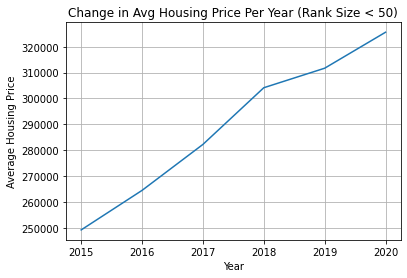

In [9]:
#create a line chart of the mean of the housing mean
# x-axis = RE_groupby_year.index.values, y-axis = RE_groupby_year["mean"] 
# the index values are the years, 2015, 2016 , etc. 
plt.plot(RE_groupby_year.index.values, RE_groupby_year["mean"])

# Add labels and title to graph
plt.xlabel("Year")
plt.ylabel("Average Housing Price")
plt.title("Change in Avg Housing Price Per Year (Rank Size < 50)")

# plt.xlim(-0.75, len(RE_groupby_year.index.values))
# plt.ylim(145000, max(RE_groupby_year["mean"])+50)

plt.grid()
plt.show()

# positive relationship
# increasing housing price from 2015 to 2020

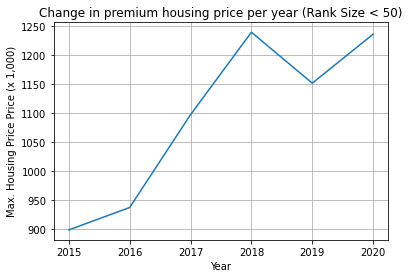

In [10]:
# looking at relationship of how much the max. housing price changes over the past 5 years
plt.plot(RE_groupby_year.index.values, RE_groupby_year["max"]/1000)

# Add labels and title to graph
plt.xlabel("Year")
plt.ylabel("Max. Housing Price Price (x 1,000)")
plt.title("Change in premium housing price per year (Rank Size < 50)")

plt.grid()
plt.show()

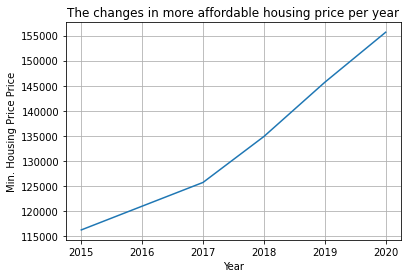

In [11]:
# looking at relationship of how much the min. housing price changes over the past 5 years
plt.plot(RE_groupby_year.index.values, RE_groupby_year["min"])

# Add labels and title to graph
plt.xlabel("Year")
plt.ylabel("Min. Housing Price Price")
plt.title("The changes in more affordable housing price per year")

plt.grid()
plt.show()

In [12]:
# grouping the housing price by state
RE_groupby_state = no_duplicate_RE_df.groupby(["State Name", "Year"]).describe()["Housing Price"]
# RE_groupby_state.head()

In [13]:
# looking at the median housing price
RE_groupby_state_median = RE_groupby_state["50%"]
# RE_groupby_state_median.head()


In [14]:
state_year_min_max = no_duplicate_RE_df.groupby(["State Name", "Year", "City Name"])["Housing Price"].agg(["min", "max"])
# state_year_min_max
# state_year_median = no_duplicate_RE_df.groupby(["State Name", "Year", "City Name"])["Housing Price"].median()
# state_year_median

In [15]:
state_year_min_max_2 = state_year_min_max.reset_index()
state_year_min_max_2.sort_values(["State Name", "max"], inplace=True)
state_year_min_max_2.groupby(["State Name", "Year"]).last()

City Name       min       max
State Name Year                                
AL         2015  Birmingham  139393.0  142528.0
           2016  Birmingham  142635.0  147975.0
           2017  Birmingham  148599.0  153188.0
           2018  Birmingham  153865.0  161841.0
           2019  Birmingham  162361.0  171450.0
...                     ...       ...       ...
WI         2016   Milwaukee  151726.0  159482.0
           2017   Milwaukee  160212.0  167940.0
           2018   Milwaukee  169370.0  178285.0
           2019   Milwaukee  178439.0  186876.0
           2020   Milwaukee  187973.0  202012.0

[186 rows x 3 columns]

In [16]:
state_year_min_max2 = state_year_min_max.copy().reset_index()
ls = {}
for i, row in state_year_min_max2.iterrows():
    if row["State Name"] not in ls:
        ls[row["State Name"]] = [10000000000, 0, "", "", 0, 0]
    if ls[row["State Name"]][0]>row["min"]:
        ls[row["State Name"]][0] =row["min"]
        ls[row["State Name"]][2] = row["City Name"]
        ls[row["State Name"]][4] = row["Year"]
    if ls[row["State Name"]][1]<row["max"]:
        ls[row["State Name"]][1] =row["max"]
        ls[row["State Name"]][3] = row["City Name"]
        ls[row["State Name"]][5] = row["Year"]
    a= 1
print(row)
# print(ls)
max_min_state_year = pd.DataFrame(ls).T
max_min_state_year.head()

State Name           WI
Year               2020
City Name     Milwaukee
min              187973
max              202012
Name: 299, dtype: object


,0,1,2,3,4,5
AL,139393,184012,Birmingham,Birmingham,2015,2020
AZ,202761,315045,Phoenix,Phoenix,2015,2020
CA,291739,1.23959e+06,Riverside,San Jose,2015,2018
CO,304796,468128,Denver,Denver,2015,2020
CT,219932,250566,Hartford,Hartford,2015,2020


In [17]:
max_min_state_year = max_min_state_year.rename(columns={
        0: "Min. Housing Price",
        1: "Max. Housing Price",
        2: "City of Min. Housing Price",
        3: "City of Max. Housing Price",
        4: "Year of Min. Housing Price",
        5: "Year of Max. Housing Price"})

max_min_state_year.head()

,Min. Housing Price,Max. Housing Price,City of Min. Housing Price,City of Max. Housing Price,Year of Min. Housing Price,Year of Max. Housing Price
AL,139393,184012,Birmingham,Birmingham,2015,2020
AZ,202761,315045,Phoenix,Phoenix,2015,2020
CA,291739,1.23959e+06,Riverside,San Jose,2015,2018
CO,304796,468128,Denver,Denver,2015,2020
CT,219932,250566,Hartford,Hartford,2015,2020


In [18]:
max_min_state_year1 = max_min_state_year[max_min_state_year.index !="Country"]
max_min_state_year1.head()

,Min. Housing Price,Max. Housing Price,City of Min. Housing Price,City of Max. Housing Price,Year of Min. Housing Price,Year of Max. Housing Price
AL,139393,184012,Birmingham,Birmingham,2015,2020
AZ,202761,315045,Phoenix,Phoenix,2015,2020
CA,291739,1.23959e+06,Riverside,San Jose,2015,2018
CO,304796,468128,Denver,Denver,2015,2020
CT,219932,250566,Hartford,Hartford,2015,2020


Text(0.5, 1.0, 'The Min. & Max housing price of each State (Rank Size < 50)')

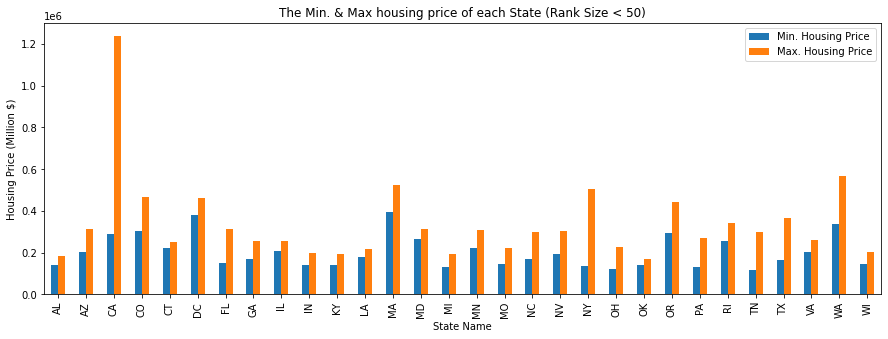

In [19]:
# max and min. housing price of all the state that has rank size of below 50
max_housing_price_bar = max_min_state_year1.plot(kind="bar", figsize=(15,5))

plt.xlabel("State Name")
plt.ylabel("Housing Price (Million $)")
plt.title("The Min. & Max housing price of each State (Rank Size < 50)")

In [20]:
# grouping the housing price by state and take the median price
state_year_median = no_duplicate_RE_df.groupby("State Name")["Housing Price"].median()
state_year_median = state_year_median[state_year_median.index != "Country"]
# state_year_median.head()

Text(0, 0.5, 'Housing Price')

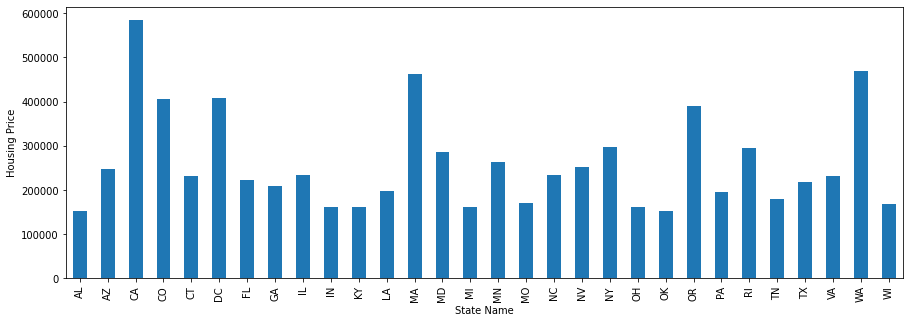

In [21]:
# avg housing price of each state 
state_year_median_bar = state_year_median.plot(kind="bar", figsize=(15,5))

plt.xlabel("State Name")
plt.ylabel("Housing Price")


In [22]:
homelessdata = "../Data/PIT_AllYearsData_Output.csv"
homeless_df = pd.read_csv(homelessdata)
homeless_df.head()

,Year,State,Overall Homeless,Sheltered Total Homeless,Unsheltered Homeless,Overall Homeless Individuals,Sheltered Total Homeless Individuals,Unsheltered Homeless Individuals,Overall Homeless People in Families,Sheltered Total Homeless People in Families,...,Unsheltered Chronically Homeless,Overall Chronically Homeless Individuals,Sheltered Total Chronically Homeless Individuals,Unsheltered Chronically Homeless Individuals,Overall Chronically Homeless People in Families,Sheltered Total Chronically Homeless People in Families,Unsheltered Chronically Homeless People in Families,Overall Homeless Veterans,Sheltered Total Homeless Veterans,Unsheltered Homeless Veterans
0,2019,AK,1907.0,1634,273,1384,1118,266,523,516,...,99,231,134,97,38,36,2,111,85,26
1,2019,AL,3261.0,2070,1191,2519,1429,1090,742,641,...,139,350,221,129,19,9,10,292,223,69
2,2019,AR,2717.0,1302,1415,2303,972,1331,414,330,...,453,676,223,453,15,15,0,238,153,85
3,2019,AZ,10007.0,5475,4532,7538,3099,4439,2469,2376,...,1210,1766,599,1167,110,67,43,910,598,312
4,2019,CA,151278.0,42846,108432,128777,25323,103454,22501,17523,...,33670,39275,6483,32792,2282,1404,878,10980,3261,7719


In [23]:
#group homeless by state
homeless_df_state = homeless_df.groupby("State").mean()
homeless_df_state.head()

,Year,Overall Homeless
State,,
AK,2017,1932.8
AL,2017,3713.8
AR,2017,2583.8
AZ,2017,9684.4
CA,2017,129332.4


In [24]:
RE_groupby_state1 = no_duplicate_RE_df.groupby("State Name").describe()["Housing Price"]
RE_groupby_state1.head()

,count,mean,std,min,25%,50%,75%,max
State Name,,,,,,,,
AL,70.0,155941.628571,12647.825806,139393.0,145055.75,152861.5,164418.50,184012.0
AZ,70.0,250125.157143,29501.454051,202761.0,225481.75,247734.0,270633.00,315045.0
CA,420.0,656780.485714,281018.948460,291739.0,399352.25,585473.0,909470.50,1239591.0
CO,70.0,397450.028571,45538.487246,304796.0,361325.75,405354.0,436518.75,468128.0
CT,70.0,229969.528571,7251.453283,219932.0,222403.25,231056.5,234711.25,250566.0


In [25]:
# There's a country data in the dataframe, so I drop that from my dataframe.
RE_no_country_df1 = RE_groupby_state1[RE_groupby_state1.index !="Country"]
# RE_no_country_df1.head()


In [26]:
# merging two dataframe together, Real State without Country, and Homeless dataframe
joined_RE_HL = pd.merge(RE_no_country_df1, homeless_df_state, how='inner', left_index=True, right_index=True)
joined_RE_HL.head()


,count,mean,std,min,25%,50%,75%,max,Year,Overall Homeless
AL,70.0,155941.628571,12647.825806,139393.0,145055.75,152861.5,164418.50,184012.0,2017,3713.8
AZ,70.0,250125.157143,29501.454051,202761.0,225481.75,247734.0,270633.00,315045.0,2017,9684.4
CA,420.0,656780.485714,281018.948460,291739.0,399352.25,585473.0,909470.50,1239591.0,2017,129332.4
CO,70.0,397450.028571,45538.487246,304796.0,361325.75,405354.0,436518.75,468128.0,2017,10383.8
CT,70.0,229969.528571,7251.453283,219932.0,222403.25,231056.5,234711.25,250566.0,2017,3669.2


(0.6332034642260985, 0.00017294323461548)
The correlation between average housing price and homeless population is 0.63


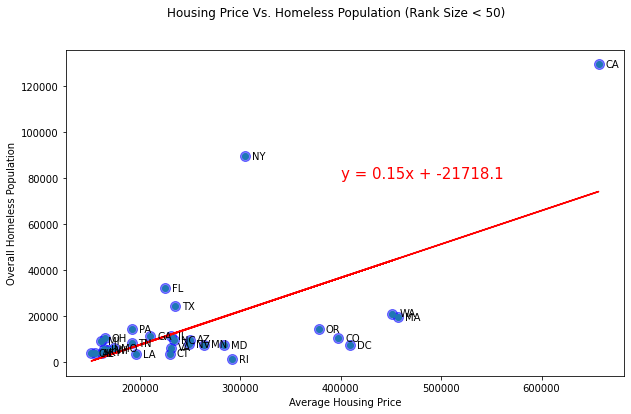

In [27]:
# creating a scatter plot
x = joined_RE_HL["mean"]
y = joined_RE_HL["Overall Homeless"]

# finding the correlation 
correlation = sts.pearsonr(x, y)
print(correlation)

print(f"The correlation between average housing price and homeless population is {round(correlation[0],2)}")


labels = joined_RE_HL.index

fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Housing Price Vs. Homeless Population (Rank Size < 50)')

# Create the Scatter Plot
ax.scatter(x, y,
            color="blue",    # Color of the dots
            s=100,           # Size of the dots
            alpha=0.5,       # Alpha/transparency of the dots (1 is opaque, 0 is transparent)
            linewidths=1)    # Size of edge around the dots

for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
    
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Average Housing Price')
plt.ylabel('Overall Homeless Population')
plt.scatter(x, y)
plt.annotate(line_eq,(400000,80000),fontsize=15,color="red")
plt.plot(x,regress_values,"r-")

# Show the plot
plt.show()

In [28]:
# using the homeless dataframe, remove NY and CA, start with no NY state
homeless_no_NY = homeless_df_state[homeless_df_state.index !="NY"]
# homeless_no_NY.head()

# remove CA from the dataframe 
homeless_no_CA_NY = homeless_no_NY[homeless_no_NY.index !="CA"]
# homeless_no_CA_NY.head()

# remove the CA state from real estate dataframe
RE_no_CA = RE_no_country_df1[RE_no_country_df1.index !="CA"]
# RE_no_CA.head()

# remove the NY state from real estate dataframe
RE_no_CA_NY = RE_no_CA[RE_no_CA.index !="NY"]
# RE_no_CA_NY.head()


In [29]:
joined_no_NY_CA = pd.merge(RE_no_CA_NY, homeless_no_CA_NY, how='inner', left_index= True, right_index=True)
# joined_no_NY_CA


(0.35910029657461634, 0.06055993607155463)
The correlation between average housing price and homeless population is 0.36


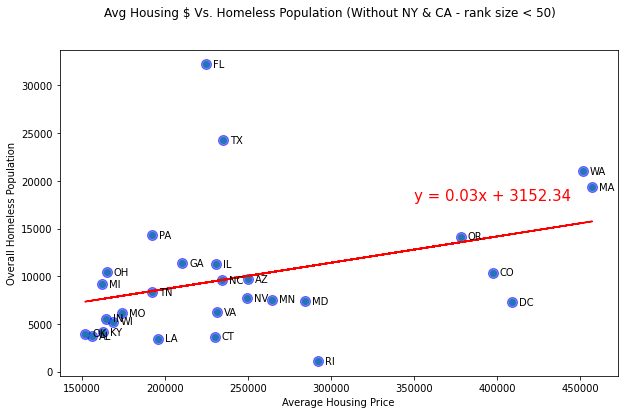

In [30]:
# creating a scatter plot
x = joined_no_NY_CA["mean"]
y = joined_no_NY_CA["Overall Homeless"]

# finding the correlation 
correlation = sts.pearsonr(x, y)
print(correlation)

print(f"The correlation between average housing price and homeless population is {round(correlation[0],2)}")

labels = joined_no_NY_CA.index

fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Avg Housing $ Vs. Homeless Population (Without NY & CA - rank size < 50)')

# Create the Scatter Plot
ax.scatter(x, y,
            color="blue",    # Color of the dots
            s=100,           # Size of the dots
            alpha=0.5,       # Alpha/transparency of the dots (1 is opaque, 0 is transparent)
            linewidths=1)    # Size of edge around the dots

for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
    
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Average Housing Price')
plt.ylabel('Overall Homeless Population')
plt.scatter(x, y)
plt.annotate(line_eq,(350000,18000),fontsize=15,color="red")
plt.plot(x,regress_values,"r-")

# Show the plot
plt.show()

In [31]:
# Extracting the path
state_population = "../Data/State_Names_Sheet3.csv"

In [32]:
# Read Real Estate Data from Zillow (from year 2015 to 2020)
state_population1 = pd.read_csv(state_population).set_index('State')
state_population1.head()

,Population
State,
AL,4888949
AK,738068
AZ,7123898
AR,3020327
CA,39776830


In [33]:
# homeless_df_state

In [34]:
joined_population_homeless = pd.merge(state_population1, homeless_df_state, how='inner', left_index=True, right_index=True)
joined_population_homeless.head()

,Population,Year,Overall Homeless
State,,,
AL,4888949,2017,3713.8
AK,738068,2017,1932.8
AZ,7123898,2017,9684.4
AR,3020327,2017,2583.8
CA,39776830,2017,129332.4


In [35]:
# calculating the homelessness rate 
joined_population_homeless["Homelessness_rate"] = joined_population_homeless["Overall Homeless"]/joined_population_homeless["Population "]*100
# joined_population_homeless["Homelessness_rate"]



In [36]:
# add the homeless rate to the dataframe
joined_2 = pd.merge(RE_no_country_df1, joined_population_homeless, how='inner', left_index=True, right_index=True)
joined_2.head()


,count,mean,std,min,25%,50%,75%,max,Population,Year,Overall Homeless,Homelessness_rate
AL,70.0,155941.628571,12647.825806,139393.0,145055.75,152861.5,164418.50,184012.0,4888949,2017,3713.8,0.075963
AZ,70.0,250125.157143,29501.454051,202761.0,225481.75,247734.0,270633.00,315045.0,7123898,2017,9684.4,0.135942
CA,420.0,656780.485714,281018.948460,291739.0,399352.25,585473.0,909470.50,1239591.0,39776830,2017,129332.4,0.325145
CO,70.0,397450.028571,45538.487246,304796.0,361325.75,405354.0,436518.75,468128.0,5684203,2017,10383.8,0.182678
CT,70.0,229969.528571,7251.453283,219932.0,222403.25,231056.5,234711.25,250566.0,3588683,2017,3669.2,0.102244


(0.5596968514787194, 0.0013003099988970486)
The correlation between average housing price and homeless rate is 0.56


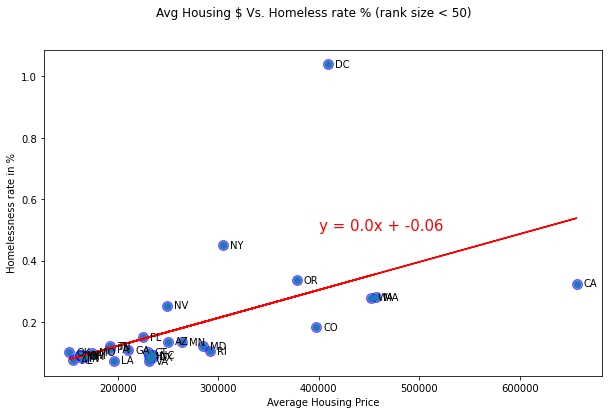

In [37]:
# plot homelessness vs. avg pricing 

# creating a scatter plot
x = joined_2["mean"]
y = joined_2["Homelessness_rate"]

# finding the correlation 
correlation = sts.pearsonr(x, y)
print(correlation)

print(f"The correlation between average housing price and homeless rate is {round(correlation[0],2)}")

labels = joined_2.index

fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Avg Housing $ Vs. Homeless rate % (rank size < 50)')

# Create the Scatter Plot
ax.scatter(x, y,
            color="blue",    # Color of the dots
            s=100,           # Size of the dots
            alpha=0.5,       # Alpha/transparency of the dots (1 is opaque, 0 is transparent)
            linewidths=1)    # Size of edge around the dots

for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
    
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Average Housing Price')
plt.ylabel('Homelessness rate in %')
# plt.ylim(0, 0.6)
plt.scatter(x, y)
plt.annotate(line_eq,(400000,0.5),fontsize=15,color="red")
plt.plot(x,regress_values,"r-")

# Show the plot
plt.show()